# Projet Final R

Victor Simonin & Alexandre Lemonnier

Dataset : `decathlon.csv`

In [6]:
install.packages("factoextra")

Installing package into ‘/home/bictole/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘jquerylib’, ‘promises’, ‘viridis’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




---

## Import des bibliothèques

Pour commencer il est nécessaire d'importer les bibliothèques qui nous permettront d'utiliser leurs fonctions par la suite du projet

In [8]:
library("VIM") # Pour la visualisation des valeurs manquantes
library("corrplot") # Pour les matrices de corrélation.
library("factoextra") # Pour les graphes de l'ACP
library("FactoMineR")

---

## Lecture du dataset

In [16]:
df = read.table('data/decathlon.csv',header = T ,sep = ';', dec = '.', row.names = 1)
head(df)

,X100m,Longueur,Poids,Hauteur,X400m,X110m.H,Disque,Perche,Javelot,X1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,JO
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,JO
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54,6,8287,JO


Le dataset ci-dessus est composé de plusieurs données assez différentes. Celles-ci représentent les scores obtenues par des athlètes de l'épreuve du decathlon au Jeux Olympiques, donc les scores des 10 épreuves ainsi que leur classement et leurs points.

---

## Visualisation des données manquantes

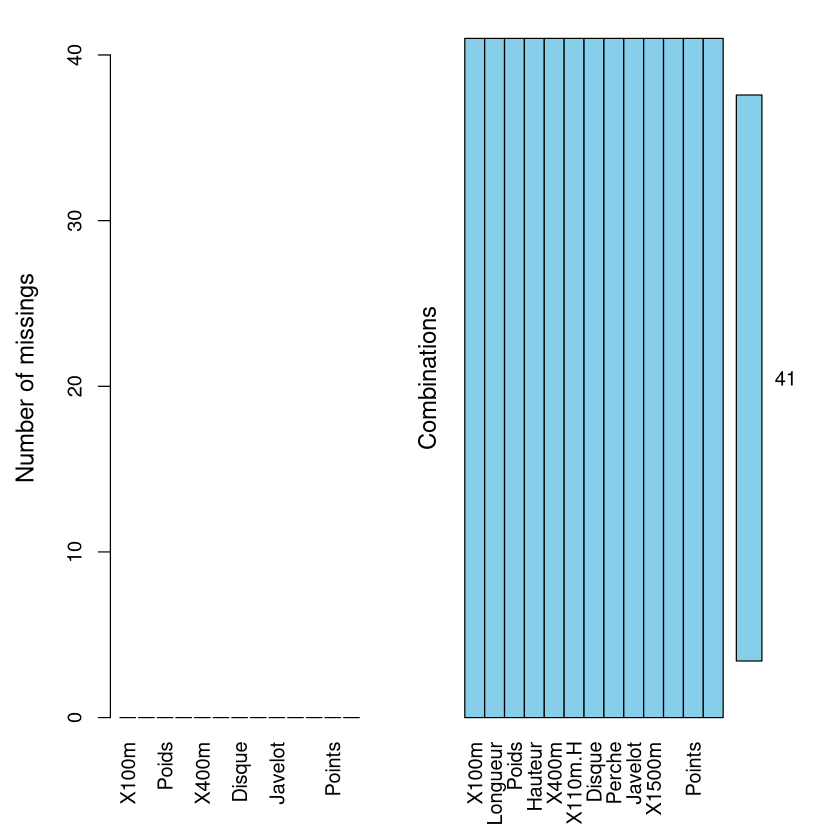

In [17]:
missdata = aggr(df, prop = F, number = T)

On peut voir ici que notre dataset ne semble pas contenir de données manquantes, ce qui facilite notre analyse et nous permet de continuer sereinement. Deux choix étaient possibles si jamais le dataset contenait des données manquantes, soit la suppression des lignes qui ne sont pas complètes, ou alors il est possible d'inférer ces données manquantes par plusieurs algorithmes.

Il faudra néanmoins vérifier qu’il n’y a aucune valeures aberrantes.

## Description du dataset

Cette section va nous servir à comprendre un peu mieux notre dataset, notamment sur sa taille, ses attributs et quelques statistiques descriptives sur les colonnes. 

In [18]:
dim(df)

[1] 41 13

On comprend donc ici que notre dataset se compose de 41 individus qui ont chacun 13 données dans les colonnes qui servent à les qualifier et à les décrire.

In [19]:
attributes(df)

$names
 [1] "X100m"       "Longueur"    "Poids"       "Hauteur"     "X400m"      
 [6] "X110m.H"     "Disque"      "Perche"      "Javelot"     "X1500m"     
[11] "Classement"  "Points"      "Competition"

$class
[1] "data.frame"

$row.names
 [1] "Sebrle"      "Clay"        "Karpov"      "Macey"       "Warners"    
 [6] "Zsivoczky"   "Hernu"       "Nool"        "Bernard"     "Schwarzl"   
[11] "Pogorelov"   "Schoenbeck"  "Barras"      "Smith"       "Averyanov"  
[16] "Ojaniemi"    "Smirnov"     "Qi"          "Drews"       "Parkhomenko"
[21] "Terek"       "Gomez"       "Turi"        "Lorenzo"     "Karlivans"  
[26] "Korkizoglou" "Uldal"       "Casarsa"     "SEBRLE"      "CLAY"       
[31] "KARPOV"      "BERNARD"     "YURKOV"      "WARNERS"     "ZSIVOCZKY"  
[36] "McMULLEN"    "MARTINEAU"   "HERNU"       "BARRAS"      "NOOL"       
[41] "BOURGUIGNON"

In [20]:
summary(df)

     X100m          Longueur        Poids          Hauteur          X400m      
 Min.   :10.44   Min.   :6.61   Min.   :12.68   Min.   :1.850   Min.   :46.81  
 1st Qu.:10.85   1st Qu.:7.03   1st Qu.:13.88   1st Qu.:1.920   1st Qu.:48.93  
 Median :10.98   Median :7.30   Median :14.57   Median :1.950   Median :49.40  
 Mean   :11.00   Mean   :7.26   Mean   :14.48   Mean   :1.977   Mean   :49.62  
 3rd Qu.:11.14   3rd Qu.:7.48   3rd Qu.:14.97   3rd Qu.:2.040   3rd Qu.:50.30  
 Max.   :11.64   Max.   :7.96   Max.   :16.36   Max.   :2.150   Max.   :53.20  
    X110m.H          Disque          Perche         Javelot     
 Min.   :13.97   Min.   :37.92   Min.   :4.200   Min.   :50.31  
 1st Qu.:14.21   1st Qu.:41.90   1st Qu.:4.500   1st Qu.:55.27  
 Median :14.48   Median :44.41   Median :4.800   Median :58.36  
 Mean   :14.61   Mean   :44.33   Mean   :4.762   Mean   :58.32  
 3rd Qu.:14.98   3rd Qu.:46.07   3rd Qu.:4.920   3rd Qu.:60.89  
 Max.   :15.67   Max.   :51.65   Max.   :5.400   M